<div style="color:#555;float:right;"><small>lumbric &lt;lumbric@suuf.cc&gt;</small></div>
<div style="color:#555;"><small>2019-09-25 - PyUGAT</small></div>

<br><br>
<h1 style="text-align:center">xarray</h1>
<br><br><br><br>

<div style="float:right">https://github.com/pydata/xarray</div>
https://xarray.pydata.org/

<div style="weight:bolder; font-size:1.2em; width:80%;"> 
<pre>
    xarray = numpy 
</pre>
</div>


<div style="weight:bolder; font-size:1.2em; width:80%;"> 
<pre>
    xarray = numpy 
             + named axis
</pre>
</div>


<div style="weight:bolder; font-size:1.2em; width:80%;"> 
<pre>
    xarray = numpy 
             + named axis
             + coordinates
             
</pre>
</div>


<div style="weight:bolder; font-size:1.2em; width:80%;"> 
<pre>
    xarray = numpy 
             + named axis
             + coordinates
             + parallelism

</pre>
</div>


<div style="weight:bolder; font-size:1.2em; width:80%;"> 
<pre>
    xarray = numpy 
             + named axis
             + coordinates
             + parallelism

            = pandas 
             + netcdf 
             + more dimensions
</pre>
</div>

# Numpy broadcasting

In [1]:
import numpy as np

In [2]:
m = np.arange(12).reshape((3, 4))

In [3]:
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [4]:
m + 100

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111]])

In [5]:
v = np.array([1, 2, 3, 4])

In [6]:
m + v

array([[ 1,  3,  5,  7],
       [ 5,  7,  9, 11],
       [ 9, 11, 13, 15]])

In [7]:
m.shape

(3, 4)

In [8]:
v.shape

(4,)

# Broadcasting rules



    A      (2d array):  5 x 4
    B      (1d array):      1
    Result (2d array):  5 x 4

    A      (2d array):  5 x 4
    B      (1d array):      4
    Result (2d array):  5 x 4

    A      (3d array):  15 x 3 x 5
    B      (3d array):  15 x 1 x 5
    Result (3d array):  15 x 3 x 5

    A      (3d array):  15 x 3 x 5
    B      (2d array):       3 x 5
    Result (3d array):  15 x 3 x 5

    A      (3d array):  15 x 3 x 5
    B      (2d array):       3 x 1
    Result (3d array):  15 x 3 x 5
    
<small>Source: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html</small>

Here are examples of shapes that do not broadcast:

    A      (1d array):  3
    B      (1d array):  4 # trailing dimensions do not match

    A      (2d array):      2 x 1
    B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched

<small>Source: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html</small>

In [9]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [10]:
b = np.ones(5)
b

array([1., 1., 1., 1., 1.])

In [11]:
b

array([1., 1., 1., 1., 1.])

In [12]:
b[np.newaxis, :].shape

(1, 5)

In [13]:
a[:, np.newaxis] * b[np.newaxis, :]

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

# xarray?

In [14]:
import xarray as xr

In [15]:
a_xr = xr.DataArray(a, dims='a_dim')
b_xr = xr.DataArray(b, dims='b_dim')

In [16]:
a_xr

<xarray.DataArray (a_dim: 5)>
array([0, 1, 2, 3, 4])
Dimensions without coordinates: a_dim

In [17]:
b_xr

<xarray.DataArray (b_dim: 5)>
array([1., 1., 1., 1., 1.])
Dimensions without coordinates: b_dim

In [18]:
a_xr * b_xr

<xarray.DataArray (a_dim: 5, b_dim: 5)>
array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])
Dimensions without coordinates: a_dim, b_dim

# Example: wind speed time series

<small>See also: https://github.com/lumbric/python_git_programming_course</small>

In [19]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fname = '<snip>'

In [20]:
# matplotlib.rc('figure', figsize=(15, 10))

In [21]:
latitude_resolution = 100
longitude_resolution = 110
time_resolution = 365

# in m/s, postfixing with _ms does not work well, because ms is miliseconds... :-/
wind_speeds = np.random.weibull(10, size=(latitude_resolution, longitude_resolution, time_resolution))

In [22]:
wind_speeds.shape

(100, 110, 365)

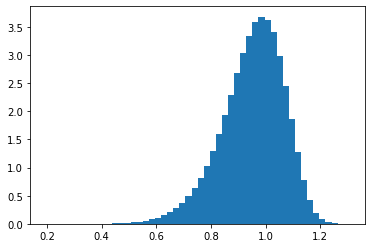

In [23]:
_ = plt.hist(wind_speeds.flatten(), density=True, bins=50)

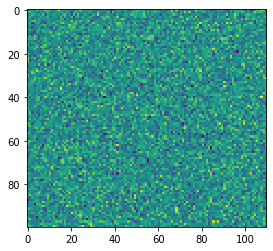

In [24]:
# m/s --> kW
wind_to_power = np.random.normal(300, scale=20, size=(latitude_resolution, longitude_resolution))
plt.imshow(wind_to_power)

In [25]:
wind_to_power * wind_speeds

ValueError: operands could not be broadcast together with shapes (100,110) (100,110,365) 

In [26]:
wind_speeds.shape

(100, 110, 365)

In [27]:
wind_to_power.shape

(100, 110)

In [28]:
wind_speeds = np.rollaxis(wind_speeds, 2)

In [29]:
wind_speeds.shape

(365, 100, 110)

In [30]:
wind_to_power.shape

(100, 110)

In [31]:
average_power = (wind_to_power * wind_speeds).mean(axis=0)

In [32]:
average_power.shape

(100, 110)

# Example: now with xarray

In [33]:
wind_speeds_raw = np.random.weibull(10, size=(latitude_resolution, longitude_resolution, time_resolution))
wind_speeds = xr.DataArray(wind_speeds_raw, dims=('latitude', 'longitude', 'time'))

In [34]:
wind_speeds

<xarray.DataArray (latitude: 100, longitude: 110, time: 365)>
array([[[1.1963458 , 0.84573038, 1.04503664, ..., 1.02864817,
         0.79344293, 0.90900402],
        [1.03062163, 1.02242157, 0.99426093, ..., 0.90651421,
         0.95611876, 0.94145439],
        [0.69456045, 1.031295  , 0.91174468, ..., 0.97036453,
         1.06951917, 0.90390805],
        ...,
        [0.78798659, 0.84765619, 0.94783674, ..., 0.94761757,
         1.01758829, 0.81971823],
        [0.92826388, 0.86691009, 0.71707721, ..., 1.04452982,
         0.95100589, 0.89877159],
        [0.73266713, 0.83243729, 0.85766444, ..., 0.92313772,
         1.04584761, 0.91687691]],

       [[0.82315065, 0.84791923, 0.92739454, ..., 1.16281114,
         0.93604562, 0.95488638],
        [1.03734605, 1.09979977, 0.9243283 , ..., 0.87989279,
         1.09716617, 1.04648863],
        [1.0047406 , 0.91883426, 0.86487508, ..., 0.68340837,
         0.84151908, 0.98009787],
        ...,
        [0.84020961, 1.05779473, 1.13771684, .

In [35]:
wind_to_power_raw = np.random.normal(300, scale=20, size=(latitude_resolution, longitude_resolution))
wind_to_power = xr.DataArray(wind_to_power_raw, dims=('latitude', 'longitude'))

In [36]:
(wind_to_power * wind_speeds).mean(dim='time')

<xarray.DataArray (latitude: 100, longitude: 110)>
array([[302.50482982, 316.52621557, 274.165602  , ..., 281.00432226,
        272.91929475, 295.41792581],
       [300.21830816, 290.68057425, 264.05347227, ..., 275.68164699,
        303.80495331, 275.60977009],
       [322.49668106, 258.19554615, 307.82754627, ..., 305.67640507,
        294.67918512, 316.77537977],
       ...,
       [297.66676233, 297.26476033, 290.88814879, ..., 269.74651896,
        294.59829414, 277.65017317],
       [270.23128418, 265.10654239, 275.01575658, ..., 286.3701931 ,
        333.85220296, 284.81174692],
       [301.89468893, 289.84696609, 282.69823085, ..., 303.34074633,
        287.90014977, 311.0024444 ]])
Dimensions without coordinates: latitude, longitude


<div style="weight:bolder; font-size:1.2em; width:80%;"> 
<pre>
    xarray = numpy 
             + named axis
             + coordinates
             + parallelism

            = pandas 
             + netcdf 
             + more dimensions
</pre>
</div>

# Coordinates

In [37]:
wind_velocity = xr.load_dataset(fname.format(m=4, y=1994))

In [38]:
wind_velocity

<xarray.Dataset>
Dimensions:    (latitude: 204, longitude: 432, time: 720)
Coordinates:
  * longitude  (longitude) float32 -172.5 -172.25 -172.0 ... -65.25 -65.0 -64.75
  * latitude   (latitude) float32 67.75 67.5 67.25 67.0 ... 17.5 17.25 17.0
  * time       (time) datetime64[ns] 1994-04-01 ... 1994-04-30T23:00:00
Data variables:
    u100       (time, latitude, longitude) float32 -7.539171 ... -6.906355
    v100       (time, latitude, longitude) float32 6.42413 ... 1.7227337
    u10        (time, latitude, longitude) float32 -5.4918623 ... -6.1959705
    v10        (time, latitude, longitude) float32 3.3198166 ... 1.5179741
Attributes:
    Conventions:  CF-1.6
    history:      2019-03-01 11:48:21 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [39]:
wind_velocity.isel(latitude=103, longitude=411, time=711).u100

<xarray.DataArray 'u100' ()>
array(6.38371, dtype=float32)
Coordinates:
    longitude  float32 -69.75
    latitude   float32 42.0
    time       datetime64[ns] 1994-04-30T15:00:00
Attributes:
    units:      m s**-1
    long_name:  100 metre U wind component

In [40]:
wind_velocity.sel(latitude=67.75, longitude=-172.5, time='1994-04-01 11:00' ).u100

<xarray.DataArray 'u100' ()>
array(-5.4206896, dtype=float32)
Coordinates:
    longitude  float32 -172.5
    latitude   float32 67.75
    time       datetime64[ns] 1994-04-01T11:00:00
Attributes:
    units:      m s**-1
    long_name:  100 metre U wind component

# Parallel computing

In [41]:
fnames = [fname.format(m=m, y=y) for m in range(1,13) for y in range(2008, 2019)]

In [42]:
wind_velocity = xr.open_mfdataset(fnames,
                                  combine='by_coords',
                                  concat_dim='time',
                                  chunks=100)

In [43]:
wind_velocity.nbytes / 1024**3  # in GB

126.63614259660244

In [44]:
wind_speed = ((wind_velocity.u100**2 + wind_velocity.u100**2)**0.5).sel(time=slice('2014', '2019'))

In [45]:
wind_speed.nbytes / 1024**3  # in GB

14.387523651123047

In [46]:
wind_speed_avg = wind_speed.mean()

In [47]:
wind_speed_avg.compute()

<xarray.DataArray 'u100' ()>
array(6.553551, dtype=float32)